# Import Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bigmartclean.csv')

# Data Prep

In [3]:
df.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New
0,0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable
1,1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non
2,2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable
3,3,FDX07,19.20,Regular,0.058778,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,perishable
4,4,NCD19,8.93,Low Fat,0.049017,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Others


In [4]:
df.columns

Index(['Unnamed: 0', 'Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_New'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0','Item_Identifier'])

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New
0,9.300,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable
1,5.920,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non
2,17.500,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable
3,19.200,Regular,0.058778,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,perishable
4,8.930,Low Fat,0.049017,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Others
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,non
8519,8.380,Regular,0.046982,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,non
8520,10.600,Low Fat,0.035186,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Others
8521,7.210,Regular,0.145221,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,non


# Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])


In [7]:
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_New','Outlet_Type','Outlet']
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [8]:
df

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New,Outlet
0,0,FDA15,9.300,0,0.016047,249.8092,OUT049,1999,1,0,1,3735.1380,2,9
1,1,DRC01,5.920,1,0.019278,48.2692,OUT018,2009,1,2,2,443.4228,1,3
2,2,FDN15,17.500,0,0.016760,141.6180,OUT049,1999,1,0,1,2097.2700,2,9
3,3,FDX07,19.200,1,0.058778,182.0950,OUT010,1998,1,2,0,732.3800,2,0
4,4,NCD19,8.930,0,0.049017,53.8614,OUT013,1987,0,2,1,994.7052,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,8518,FDF22,6.865,0,0.056783,214.5218,OUT013,1987,0,2,1,2778.3834,1,1
8519,8519,FDS36,8.380,1,0.046982,108.1570,OUT045,2002,1,1,1,549.2850,1,7
8520,8520,NCJ29,10.600,0,0.035186,85.1224,OUT035,2004,2,1,1,1193.1136,0,6
8521,8521,FDN46,7.210,1,0.145221,103.1332,OUT018,2009,1,2,2,1845.5976,1,3


In [9]:
df = pd.get_dummies(df, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_New','Outlet'])

In [10]:
df.drop(columns=['Unnamed: 0','Outlet_Identifier'],inplace=True)

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,1999,3735.1380,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,1999,2097.2700,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.058778,182.0950,1998,732.3800,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.049017,53.8614,1987,994.7052,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Splitting Data and ML

In [12]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
X = df.drop(columns=['Item_Outlet_Sales','Item_Identifier'])
y = df['Item_Outlet_Sales']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [15]:
KNN = KNeighborsRegressor()

In [16]:
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [17]:
pred_train_KNN = KNN.predict(X_train)

In [18]:
r2_train_KNN = r2_score(y_train,pred_train_KNN)
r2_train_KNN

0.6522126945980841

In [19]:
pred_test_KNN = KNN.predict(X_test)

In [20]:
r2_test_KNN = r2_score(y_test,pred_test_KNN)
r2_test_KNN

0.48891997260071773

In [21]:
KNN.score(X_test,y_test)

0.48891997260071773

In [22]:
KNN.score(X_train,y_train)

0.6522126945980841

In [23]:
RF = RandomForestRegressor()

In [24]:
RF.fit(X_train,y_train)

RandomForestRegressor()

In [25]:
pred_RF_train = RF.predict(X_train)

In [26]:
r2_train_RF = r2_score(y_train,pred_RF_train)
r2_train_RF

0.9376753265092589

In [27]:
pred_RF_test = RF.predict(X_test)

In [28]:
r2_test_RF = r2_score(y_test,pred_RF_test)
r2_test_RF

0.5801166736550778

In [29]:
from xgboost import XGBRegressor

In [30]:
XGB = XGBRegressor()

In [31]:
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
pred_XGB_train = XGB.predict(X_train)

In [33]:
r2_train_XGB = r2_score(y_train,pred_XGB_train)
r2_train_XGB

0.8500703658025871

In [34]:
pred_XGB_test = XGB.predict(X_test)

In [35]:
r2_test_XGB = r2_score(y_test,pred_XGB_test)
r2_test_XGB

0.544655103478562

# Hyper Tuning XGB

In [36]:
XGB_model = XGBRegressor()

In [37]:
param_XGB = {'max_depth': [2,3,5],
            'n_estimators' : [80,100,75],
             'gamma': [0,0.7,7,9],
             'learning_rate':[0.1,1,0.07],
             
            }

In [38]:
XGB_Tuned = GridSearchCV(estimator=XGB_model, param_grid=param_XGB, cv = 10, n_jobs=-1, verbose=1)

In [39]:
XGB_Tuned.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.3min finished


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_par

In [40]:
XGB_Tuned.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=80, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
pred_XGB_Tuned = XGB_Tuned.predict(X_test)

In [42]:
pred_XGB_Train = XGB_Tuned.predict(X_train)

In [43]:
r2_XGB_Tuned = r2_score(y_test,pred_XGB_Tuned)
r2_XGB_Tuned

0.6133858859015084

In [44]:
XGB_Tuned.score(X_train,y_train)

0.6190229999227018

In [45]:
XGB_Tuned.score(X_test,y_test)

0.6133858859015084

In [46]:
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.300,0.016047,249.8092,1999,3735.1380,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920,0.019278,48.2692,2009,443.4228,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500,0.016760,141.6180,1999,2097.2700,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200,0.058778,182.0950,1998,732.3800,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0.049017,53.8614,1987,994.7052,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,1987,2778.3834,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,8.380,0.046982,108.1570,2002,549.2850,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,2004,1193.1136,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,7.210,0.145221,103.1332,2009,1845.5976,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


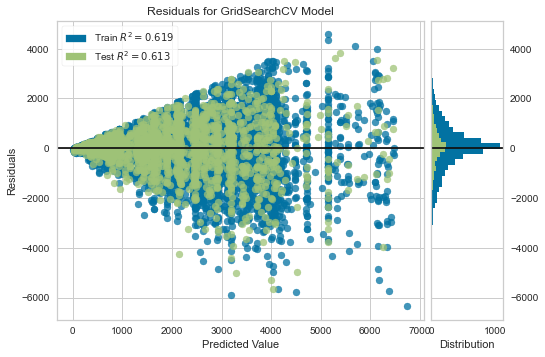

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(XGB_Tuned)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure


In [48]:
MAE_XGB = mean_absolute_error(y_test,pred_XGB_Tuned)
MAE_XGB

717.5541556222399

In [49]:
MAE_XGB_Train = mean_absolute_error(y_train,pred_XGB_Train)
MAE_XGB_Train

747.0540807212118

In [50]:
MAE_XGB/df['Item_Outlet_Sales'].mean()

0.32895878723657945

In [51]:
MSE = mean_squared_error(y_test,pred_XGB_Tuned)
MSE

1050805.5894512422

In [52]:
rmse = np.sqrt(MSE)
rmse

1025.088088630066

In [53]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,1999,3735.1380,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,1999,2097.2700,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.058778,182.0950,1998,732.3800,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.049017,53.8614,1987,994.7052,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [55]:
import joblib
joblib.dump(XGB_Tuned,'ModelXGB')

['ModelXGB']

# Hyper Tuning RF

In [103]:
RF_Tuned = RandomForestRegressor()

In [104]:
param_RF = {
            'n_estimators' : [100,200,300,500],
            'max_depth':[1,3,7,None],
            'min_samples_split' :[20,5,2],
            'min_impurity_decrease':[0.0,0.5,0.7]
}


In [105]:
RF_Tuned = GridSearchCV(estimator=RF_Tuned, param_grid=param_RF, cv = 10, n_jobs=-1, verbose=1)

In [106]:
RF_Tuned.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 35.4min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 7, None],
                         'min_impurity_decrease': [0.0, 0.5, 0.7],
                         'min_samples_split': [20, 5, 2],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=1)

In [108]:
RF_Tuned.score(X_test,y_test)

0.6143839819093464

In [109]:
RF_Tuned.score(X_train,y_train)

0.6340331102908825

In [110]:
RF_Tuned.predict([[1.30,0.12,200,1998,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0]])

array([3152.4318759])

In [111]:
pred_RF_Tuned = RF_Tuned.predict(X_test)

In [112]:
MAE_RF= mean_absolute_error(y_test,pred_RF_Tuned)
MAE_RF

715.176282470475

In [113]:
MSE_RF = mean_squared_error(y_test,pred_RF_Tuned)
MSE_RF

1048092.7943783287

In [114]:
RMSE_RF = np.sqrt(MSE_RF)
RMSE_RF

1023.7640325672361

# Hyper Tuning KNN

In [115]:
KNN_Tuned = KNeighborsRegressor()

In [138]:
param_knn ={
            'n_neighbors':[3,50,75,120],
            'leaf_size': [15,30,50]
}

In [139]:
KNN_Tuning = GridSearchCV(estimator=KNN_Tuned, param_grid=param_knn, cv = 10, n_jobs=-1, verbose=1)

In [140]:
KNN_Tuning.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.3s finished


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [15, 30, 50],
                         'n_neighbors': [3, 50, 75, 120]},
             verbose=1)

In [141]:
KNN_Tuning.score(X_test,y_test)

0.43381714669176175

In [142]:
KNN_Tuning.score(X_train,y_train)

0.7186661899551867